# Parameter Variation and Optimization

Create a machine with 4 poles:

In [1]:
machine = dict(
    name="PM-4-130",
    lfe=0.1,
    poles=4,
    outer_diam=0.13,
    bore_diam=0.07,
    inner_diam=0.015,
    airgap=0.0015,
     
    stator=dict(
        num_slots=12,
        rlength=1.0,
        statorRotor3=dict(
            slot_height=0.02,
            slot_h1=0.002,
            slot_h2=0.004,
            slot_r1=0.0,
            slot_r2=0.0,
            wedge_width1=0.0,
            wedge_width2=0.0,
            middle_line=0,
            tooth_width=0.009,
            slot_top_sh=0,
            slot_width=0.003)
    ),

    magnet=dict(
        magnetSector=dict(
            magn_num=1,
            magn_width_pct=0.6,
            magn_height=0.005,
            magn_shape=0.02,
            bridge_height=0,
            magn_type=2,
            condshaft_r=0.02,
            magn_ori=1,
            magn_rfe=0.0,
            bridge_width=0,
            magn_len=1)
    ),

    windings=dict(
        num_phases=3,
        num_wires=20,
        coil_span=3.0,
        num_layers=1)
)

Use a pm_sym_fast calculation at a rotor speed of 5000 1/min:

In [2]:
operatingConditions = dict(
    speed=5000.0 / 60,
    calculationMode="pm_sym_fast",
    num_move_steps=49,
    magn_temp=20.0,
    wind_temp=60,
    current=28.284,
    angl_i_up=0.0)

Define the variation parameters with their ranges and number of steps:

In [3]:
decision_vars = [
        {"steps": 5, "bounds": [3e-3, 8e-3],
         "name": "stator.statorRotor3.slot_width",
         "label": "Slot Width/m"},
        {"steps": 5, "bounds": [0.72, 0.85],
         "name": "magnet.magnetSector.magn_width_pct",
         "label": "Rel. Magnet Width"},
        {"steps": 5, "bounds": [0.024, 0.0335],
         "name": "magnet.magnetSector.magn_shape",
         "label": "Magnet Shape/m"}
    ]

Define the objective parameters:

In [4]:
objective_vars = [
        {"name": "dqPar.torque[-1]",
         "label": "Load Torque/Nm"},
        {"name": "torque[0].ripple",
         "label": "Cogging Torque/Nm"},
        {"name": "torque[-1].ripple",
         "label": "Torque Ripple/Nm"}
    ]

Combine the objective and variation parameters and set the population size which is in this case the upper limit of the bucket size (ie. the number of parallel calculations):

In [5]:
parvardef = {
    "objective_vars": objective_vars,
    "population_size": 20,
    "decision_vars": decision_vars
}

Use logging to get a feedback during the calculation:

In [6]:
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(message)s')

Setup up an engine the drives the calculation. Here we chose a multi-core calculation: 

In [7]:
from femagtools.multiproc import Engine
engine = Engine()

Define the working directory:

In [8]:
import os
userdir = os.path.expanduser('~')
workdir = os.path.join(userdir, 'parvar2')
try:
    os.makedirs(workdir)
except OSError:
    pass

Start the parameter variation with the total 125 FE calculations (duration on a Linux i7 laptop with 4 cores: 30min):

In [9]:
import femagtools.grid
parvar = femagtools.grid.Grid(workdir)
results = parvar(parvardef, machine, operatingConditions, engine)

2017-10-30 15:13:45,788 STEPS [5, 5, 5]
2017-10-30 15:13:45,791 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2017-10-30 15:13:45,794 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)
2017-10-30 15:13:45,796 ........ 1 / 7
2017-10-30 15:13:45,806 Prepare: stator.statorRotor3.slot_width = 0.003
2017-10-30 15:13:45,808 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2017-10-30 15:13:45,810 Prepare: magnet.magnetSector.magn_shape = 0.024
2017-10-30 15:13:45,812 prepare [ 0.003  0.72   0.024]
2017-10-30 15:13:45,939 Prepare: stator.statorRotor3.slot_width = 0.00425
2017-10-30 15:13:45,943 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2017-10-30 15:13:45,946 Prepare: magnet.magnetSector.magn_shape = 0.024
2017-10-30 15:13:45,948 prepare [ 0.00425  0.72     0.024  ]
2017-10-30 15:13:45,963 Prepare: stator.statorRotor3.slot_width = 0.0055
2017-10-30 15:13:45,967 Prepare: magnet.magnetSector.magn

2017-10-30 15:18:51,127 Reading /home/tar/parvar2/16/PM-4-130_001.BATCH
2017-10-30 15:18:51,148 ........ 2 / 7
2017-10-30 15:18:51,319 Prepare: stator.statorRotor3.slot_width = 0.0055
2017-10-30 15:18:51,321 Prepare: magnet.magnetSector.magn_width_pct = 0.8175
2017-10-30 15:18:51,323 Prepare: magnet.magnetSector.magn_shape = 0.024
2017-10-30 15:18:51,326 prepare [ 0.0055  0.8175  0.024 ]
2017-10-30 15:18:51,342 Prepare: stator.statorRotor3.slot_width = 0.00675
2017-10-30 15:18:51,344 Prepare: magnet.magnetSector.magn_width_pct = 0.8175
2017-10-30 15:18:51,346 Prepare: magnet.magnetSector.magn_shape = 0.024
2017-10-30 15:18:51,348 prepare [ 0.00675  0.8175   0.024  ]
2017-10-30 15:18:51,361 Prepare: stator.statorRotor3.slot_width = 0.008
2017-10-30 15:18:51,364 Prepare: magnet.magnetSector.magn_width_pct = 0.8175
2017-10-30 15:18:51,366 Prepare: magnet.magnetSector.magn_shape = 0.024
2017-10-30 15:18:51,368 prepare [ 0.008   0.8175  0.024 ]
2017-10-30 15:18:51,376 Prepare: stator.stator

2017-10-30 15:24:03,029 Prepare: magnet.magnetSector.magn_width_pct = 0.7525
2017-10-30 15:24:03,031 Prepare: magnet.magnetSector.magn_shape = 0.026375
2017-10-30 15:24:03,033 prepare [ 0.008     0.7525    0.026375]
2017-10-30 15:24:03,041 Prepare: stator.statorRotor3.slot_width = 0.003
2017-10-30 15:24:03,044 Prepare: magnet.magnetSector.magn_width_pct = 0.785
2017-10-30 15:24:03,046 Prepare: magnet.magnetSector.magn_shape = 0.026375
2017-10-30 15:24:03,049 prepare [ 0.003     0.785     0.026375]
2017-10-30 15:24:03,061 Prepare: stator.statorRotor3.slot_width = 0.00425
2017-10-30 15:24:03,064 Prepare: magnet.magnetSector.magn_width_pct = 0.785
2017-10-30 15:24:03,067 Prepare: magnet.magnetSector.magn_shape = 0.026375
2017-10-30 15:24:03,069 prepare [ 0.00425   0.785     0.026375]
2017-10-30 15:24:03,083 Prepare: stator.statorRotor3.slot_width = 0.0055
2017-10-30 15:24:03,086 Prepare: magnet.magnetSector.magn_width_pct = 0.785
2017-10-30 15:24:03,093 Prepare: magnet.magnetSector.magn_s

2017-10-30 15:29:25,651 Prepare: magnet.magnetSector.magn_shape = 0.02875
2017-10-30 15:29:25,654 prepare [ 0.00425  0.72     0.02875]
2017-10-30 15:29:25,666 Prepare: stator.statorRotor3.slot_width = 0.0055
2017-10-30 15:29:25,668 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2017-10-30 15:29:25,671 Prepare: magnet.magnetSector.magn_shape = 0.02875
2017-10-30 15:29:25,673 prepare [ 0.0055   0.72     0.02875]
2017-10-30 15:29:25,684 Prepare: stator.statorRotor3.slot_width = 0.00675
2017-10-30 15:29:25,687 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2017-10-30 15:29:25,690 Prepare: magnet.magnetSector.magn_shape = 0.02875
2017-10-30 15:29:25,693 prepare [ 0.00675  0.72     0.02875]
2017-10-30 15:29:25,708 Prepare: stator.statorRotor3.slot_width = 0.008
2017-10-30 15:29:25,714 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2017-10-30 15:29:25,717 Prepare: magnet.magnetSector.magn_shape = 0.02875
2017-10-30 15:29:25,720 prepare [ 0.008    0.72     0.02875]
2017-10-30 15:29

2017-10-30 15:32:58,324 Prepare: stator.statorRotor3.slot_width = 0.008
2017-10-30 15:32:58,329 Prepare: magnet.magnetSector.magn_width_pct = 0.8175
2017-10-30 15:32:58,332 Prepare: magnet.magnetSector.magn_shape = 0.02875
2017-10-30 15:32:58,335 prepare [ 0.008    0.8175   0.02875]
2017-10-30 15:32:58,347 Prepare: stator.statorRotor3.slot_width = 0.003
2017-10-30 15:32:58,350 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2017-10-30 15:32:58,353 Prepare: magnet.magnetSector.magn_shape = 0.02875
2017-10-30 15:32:58,356 prepare [ 0.003    0.85     0.02875]
2017-10-30 15:32:58,369 Prepare: stator.statorRotor3.slot_width = 0.00425
2017-10-30 15:32:58,371 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2017-10-30 15:32:58,373 Prepare: magnet.magnetSector.magn_shape = 0.02875
2017-10-30 15:32:58,376 prepare [ 0.00425  0.85     0.02875]
2017-10-30 15:32:58,390 Prepare: stator.statorRotor3.slot_width = 0.0055
2017-10-30 15:32:58,393 Prepare: magnet.magnetSector.magn_width_pct = 0.85
20

2017-10-30 15:36:18,401 Prepare: magnet.magnetSector.magn_shape = 0.031125
2017-10-30 15:36:18,404 prepare [ 0.00425   0.785     0.031125]
2017-10-30 15:36:18,412 Prepare: stator.statorRotor3.slot_width = 0.0055
2017-10-30 15:36:18,414 Prepare: magnet.magnetSector.magn_width_pct = 0.785
2017-10-30 15:36:18,416 Prepare: magnet.magnetSector.magn_shape = 0.031125
2017-10-30 15:36:18,417 prepare [ 0.0055    0.785     0.031125]
2017-10-30 15:36:18,426 Prepare: stator.statorRotor3.slot_width = 0.00675
2017-10-30 15:36:18,427 Prepare: magnet.magnetSector.magn_width_pct = 0.785
2017-10-30 15:36:18,429 Prepare: magnet.magnetSector.magn_shape = 0.031125
2017-10-30 15:36:18,431 prepare [ 0.00675   0.785     0.031125]
2017-10-30 15:36:18,438 Prepare: stator.statorRotor3.slot_width = 0.008
2017-10-30 15:36:18,440 Prepare: magnet.magnetSector.magn_width_pct = 0.785
2017-10-30 15:36:18,442 Prepare: magnet.magnetSector.magn_shape = 0.031125
2017-10-30 15:36:18,443 prepare [ 0.008     0.785     0.03112

2017-10-30 15:39:40,642 prepare [ 0.00675  0.72     0.0335 ]
2017-10-30 15:39:40,654 Prepare: stator.statorRotor3.slot_width = 0.008
2017-10-30 15:39:40,656 Prepare: magnet.magnetSector.magn_width_pct = 0.72
2017-10-30 15:39:40,659 Prepare: magnet.magnetSector.magn_shape = 0.0335
2017-10-30 15:39:40,662 prepare [ 0.008   0.72    0.0335]
2017-10-30 15:39:40,673 Prepare: stator.statorRotor3.slot_width = 0.003
2017-10-30 15:39:40,676 Prepare: magnet.magnetSector.magn_width_pct = 0.7525
2017-10-30 15:39:40,679 Prepare: magnet.magnetSector.magn_shape = 0.0335
2017-10-30 15:39:40,682 prepare [ 0.003   0.7525  0.0335]
2017-10-30 15:39:40,697 Prepare: stator.statorRotor3.slot_width = 0.00425
2017-10-30 15:39:40,702 Prepare: magnet.magnetSector.magn_width_pct = 0.7525
2017-10-30 15:39:40,705 Prepare: magnet.magnetSector.magn_shape = 0.0335
2017-10-30 15:39:40,708 prepare [ 0.00425  0.7525   0.0335 ]
2017-10-30 15:39:40,720 Prepare: stator.statorRotor3.slot_width = 0.0055
2017-10-30 15:39:40,723

2017-10-30 15:43:11,130 Prepare: magnet.magnetSector.magn_shape = 0.0335
2017-10-30 15:43:11,132 prepare [ 0.00425  0.85     0.0335 ]
2017-10-30 15:43:11,140 Prepare: stator.statorRotor3.slot_width = 0.0055
2017-10-30 15:43:11,142 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2017-10-30 15:43:11,145 Prepare: magnet.magnetSector.magn_shape = 0.0335
2017-10-30 15:43:11,147 prepare [ 0.0055  0.85    0.0335]
2017-10-30 15:43:11,160 Prepare: stator.statorRotor3.slot_width = 0.00675
2017-10-30 15:43:11,165 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2017-10-30 15:43:11,168 Prepare: magnet.magnetSector.magn_shape = 0.0335
2017-10-30 15:43:11,171 prepare [ 0.00675  0.85     0.0335 ]
2017-10-30 15:43:11,183 Prepare: stator.statorRotor3.slot_width = 0.008
2017-10-30 15:43:11,186 Prepare: magnet.magnetSector.magn_width_pct = 0.85
2017-10-30 15:43:11,189 Prepare: magnet.magnetSector.magn_shape = 0.0335
2017-10-30 15:43:11,191 prepare [ 0.008   0.85    0.0335]
2017-10-30 15:43:11,240 St

Print the results in table form:

In [10]:
import numpy as np
x = femagtools.grid.create_parameter_range(results['x'])
f = np.reshape(results['f'], (np.shape(results['f'])[0], np.shape(x)[0]))

# print header
print(' '.join(['{:15}'.format(s)
                for s in [d['label']
                          for d in parvardef['decision_vars']] +
                [o['label']
                 for o in parvardef['objective_vars']]]))
print()
# print values in table format
for l in np.hstack((x, f.T)):
    print(' '.join(['{:15.4f}'.format(x) for x in l]))

Slot Width/m    Rel. Magnet Width Magnet Shape/m  Load Torque/Nm  Cogging Torque/Nm Torque Ripple/Nm

         0.0030          0.7200          0.0240         13.8000          0.0664          0.4000
         0.0043          0.7200          0.0240         13.6000          0.1467          0.5100
         0.0055          0.7200          0.0240         13.4000          0.2797          0.6400
         0.0067          0.7200          0.0240         13.2000          0.4200          0.8000
         0.0080          0.7200          0.0240         12.9000          0.5493          1.0000
         0.0030          0.7525          0.0240         13.9000          0.0811          0.2100
         0.0043          0.7525          0.0240         13.8000          0.1113          0.2700
         0.0055          0.7525          0.0240         13.6000          0.1317          0.3500
         0.0067          0.7525          0.0240         13.3000          0.1561          0.4300
         0.0080          0.7525   

The next step will be the creation of the oareto sets. Before doing that we must define the optimization criteria. We want all values be minimize with the exception of the torque:

In [11]:
parvardef['objective_vars'][0]['sign']=-1

Now we are ready to create the pareto sets:

In [12]:
import femagtools.moproblem
import femagtools.moo

size = np.shape(f)[1]
prob = femagtools.moproblem.FemagMoProblem(parvardef['decision_vars'],
                                           parvardef['objective_vars'])

pop = femagtools.moo.Population(prob, size)
signs = [o.get('sign', 1)
         for o in parvardef['objective_vars']]
pop.populate(x, f, signs)
                               
px = pop.get_ranked_decisions()
po = pop.get_ranked_objectives(signs)
#
fp = dict()
xp = dict()
for k in po:
    #print("k {} len {}".format(k, len(pareto[k])))
    fp[k] = np.array(po[k]).T
    xp[k] = np.array(px[k]).T

for k in xp:
    xp[k] = [xp[k][0]*1e3, xp[k][1], xp[k][2]*1e3]

2017-10-30 15:49:24,631 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2017-10-30 15:49:24,634 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)


Show the results of the pareto front

In [13]:
np.concatenate((np.array(xp[0]), fp[0])).T

array([[  3.     ,   0.785  ,  24.     ,  14.     ,   0.06441,   0.11   ],
       [  3.     ,   0.85   ,  24.     ,  14.     ,   0.04048,   0.14   ],
       [  3.     ,   0.72   ,  26.375  ,  14.4    ,   0.194  ,   0.6    ],
       [  3.     ,   0.7525 ,  26.375  ,  14.6    ,   0.2814 ,   0.39   ],
       [  3.     ,   0.785  ,  26.375  ,  14.7    ,   0.2692 ,   0.44   ],
       [  3.     ,   0.85   ,  26.375  ,  14.9    ,   0.217  ,   0.48   ],
       [  3.     ,   0.72   ,  28.75   ,  15.     ,   0.428  ,   0.83   ],
       [  3.     ,   0.7525 ,  28.75   ,  15.2    ,   0.6445 ,   0.8    ],
       [  3.     ,   0.785  ,  28.75   ,  15.4    ,   0.6187 ,   0.9    ],
       [  3.     ,   0.85   ,  28.75   ,  15.6    ,   0.5542 ,   0.95   ],
       [  3.     ,   0.7525 ,  31.125  ,  15.7    ,   1.1581 ,   1.38   ],
       [  3.     ,   0.785  ,  31.125  ,  15.9    ,   1.1768 ,   1.58   ],
       [  3.     ,   0.85   ,  31.125  ,  16.1    ,   1.1416 ,   1.6    ],
       [  3.     ,   0.72

Display a 3D scatter plot with all results and the pareto front:

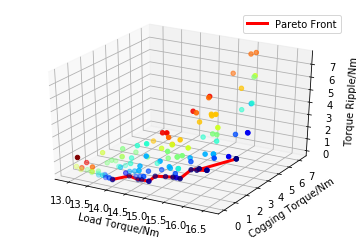

In [14]:
import matplotlib.pyplot as pl
import matplotlib.colors
import matplotlib.cm
import mpl_toolkits.mplot3d as mpl

cm = pl.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=0, vmax=max(fp.keys()))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)

fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
for k in fp:
    ax.scatter(fp[k][0], fp[k][1], fp[k][2], color=scalarMap.to_rgba(k))
ax.plot(fp[0][0], fp[0][1], fp[0][2],
        color='red', linewidth=3, label='Pareto Front')
ax.set_xlabel(parvardef['objective_vars'][0]['label'])
ax.set_ylabel(parvardef['objective_vars'][1]['label'])
ax.set_zlabel(parvardef['objective_vars'][2]['label'])

pl.legend()
pl.show()

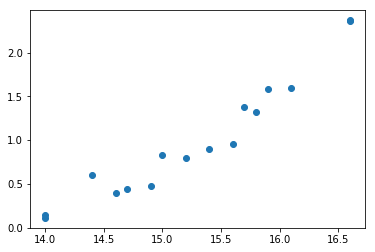

In [15]:
pl.plot(fp[0][0], fp[0][2], 'o')
pl.show()

With multi objective optimization

In [16]:
import femagtools.opt
import femagtools.condor

workdir = os.path.join(userdir, 'opti')
try:
    os.makedirs(workdir)
except OSError:
    pass

parvardef['population_size'] = 32

parvardef['decision_vars'][0]['desc'] = 'Slot width/mm' 
parvardef['decision_vars'][1]['desc'] = 'rel. Magn. width' 
parvardef['decision_vars'][2]['desc'] = 'Magn. Shape/mm' 
parvardef['objective_vars'][0]['desc'] = 'Load Torque/Nm' 
parvardef['objective_vars'][1]['desc'] = 'Cogging Torque/Nm' 
parvardef['objective_vars'][2]['desc'] = 'Torque Ripple/Nm' 

engine = femagtools.condor.Engine()
opt = femagtools.opt.Optimizer(workdir, magnetizingCurves=dict(), magnetMat=dict())
num_generations = 3
results = opt.optimize(num_generations, parvardef, machine, operatingConditions, engine)

2017-10-30 15:50:42,644 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2017-10-30 15:50:42,646 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)
2017-10-30 15:50:42,654 Optimize x:3 f:3 generations:3 population size:32
2017-10-30 15:50:42,657 Generation 0
2017-10-30 15:50:42,729 Prepare: stator.statorRotor3.slot_width = 0.006901227065961834
2017-10-30 15:50:42,731 Prepare: magnet.magnetSector.magn_width_pct = 0.8392199204543361
2017-10-30 15:50:42,734 Prepare: magnet.magnetSector.magn_shape = 0.03281609356411196
2017-10-30 15:50:42,859 Prepare: stator.statorRotor3.slot_width = 0.007158868415395981
2017-10-30 15:50:42,861 Prepare: magnet.magnetSector.magn_width_pct = 0.7667729810900695
2017-10-30 15:50:42,863 Prepare: magnet.magnetSector.magn_shape = 0.025539425300242044
2017-10-30 15:50:42,872 Prepare: stator.statorRotor3.slot_width = 0.004655262118164552
2017-10-30 15:50:42,875 Prepare: magnet.ma

2017-10-30 15:50:43,365 Prepare: stator.statorRotor3.slot_width = 0.0067590344526303366
2017-10-30 15:50:43,367 Prepare: magnet.magnetSector.magn_width_pct = 0.8272621132696466
2017-10-30 15:50:43,370 Prepare: magnet.magnetSector.magn_shape = 0.0243095546028629
2017-10-30 15:50:43,381 Prepare: stator.statorRotor3.slot_width = 0.006532988286281937
2017-10-30 15:50:43,383 Prepare: magnet.magnetSector.magn_width_pct = 0.7713249829301912
2017-10-30 15:50:43,387 Prepare: magnet.magnetSector.magn_shape = 0.029098910356390326
2017-10-30 15:50:43,725 submit cluster 193
2017-10-30 15:53:16,677 status 22: C
2017-10-30 15:53:16,680 status 20: C
2017-10-30 15:53:16,682 status 29: C
2017-10-30 15:53:16,683 status 23: C
2017-10-30 15:53:16,685 status 30: C
2017-10-30 15:53:16,687 status 28: C
2017-10-30 15:53:16,688 status 27: C
2017-10-30 15:53:16,690 status 31: C
2017-10-30 15:53:16,692 status 16: C
2017-10-30 15:53:16,694 status 19: C
2017-10-30 15:53:16,696 status 18: C
2017-10-30 15:53:16,698 s

2017-10-30 15:53:17,789 Prepare: magnet.magnetSector.magn_width_pct = 0.7654148930358687
2017-10-30 15:53:17,791 Prepare: magnet.magnetSector.magn_shape = 0.025487775616176874
2017-10-30 15:53:17,803 Prepare: stator.statorRotor3.slot_width = 0.003470970189557722
2017-10-30 15:53:17,806 Prepare: magnet.magnetSector.magn_width_pct = 0.7905487981958157
2017-10-30 15:53:17,811 Prepare: magnet.magnetSector.magn_shape = 0.0299557483366556
2017-10-30 15:53:17,822 Prepare: stator.statorRotor3.slot_width = 0.0038425928918056624
2017-10-30 15:53:17,825 Prepare: magnet.magnetSector.magn_width_pct = 0.7786989996191734
2017-10-30 15:53:17,827 Prepare: magnet.magnetSector.magn_shape = 0.028620990668774104
2017-10-30 15:53:17,841 Prepare: stator.statorRotor3.slot_width = 0.007056756806605674
2017-10-30 15:53:17,843 Prepare: magnet.magnetSector.magn_width_pct = 0.7678836518588832
2017-10-30 15:53:17,846 Prepare: magnet.magnetSector.magn_shape = 0.02597671313731732
2017-10-30 15:53:17,859 Prepare: stat

2017-10-30 15:55:36,115 Reading /home/tar/opti/4/PM-4-130_001.BATCH
2017-10-30 15:55:36,146 Reading /home/tar/opti/5/PM-4-130_001.BATCH
2017-10-30 15:55:36,170 Reading /home/tar/opti/6/PM-4-130_001.BATCH
2017-10-30 15:55:36,195 Reading /home/tar/opti/7/PM-4-130_001.BATCH
2017-10-30 15:55:36,220 Reading /home/tar/opti/8/PM-4-130_001.BATCH
2017-10-30 15:55:36,240 Reading /home/tar/opti/9/PM-4-130_001.BATCH
2017-10-30 15:55:36,259 Reading /home/tar/opti/10/PM-4-130_001.BATCH
2017-10-30 15:55:36,281 Reading /home/tar/opti/11/PM-4-130_001.BATCH
2017-10-30 15:55:36,297 Reading /home/tar/opti/12/PM-4-130_001.BATCH
2017-10-30 15:55:36,322 Reading /home/tar/opti/13/PM-4-130_001.BATCH
2017-10-30 15:55:36,343 Reading /home/tar/opti/14/PM-4-130_001.BATCH
2017-10-30 15:55:36,362 Reading /home/tar/opti/15/PM-4-130_001.BATCH
2017-10-30 15:55:36,378 Reading /home/tar/opti/16/PM-4-130_001.BATCH
2017-10-30 15:55:36,397 Reading /home/tar/opti/17/PM-4-130_001.BATCH
2017-10-30 15:55:36,419 Reading /home/ta

2017-10-30 15:55:37,203 Prepare: stator.statorRotor3.slot_width = 0.0040466850076293
2017-10-30 15:55:37,206 Prepare: magnet.magnetSector.magn_width_pct = 0.7829958253606173
2017-10-30 15:55:37,212 Prepare: magnet.magnetSector.magn_shape = 0.025278669910865473
2017-10-30 15:55:37,224 Prepare: stator.statorRotor3.slot_width = 0.0041671052495465995
2017-10-30 15:55:37,227 Prepare: magnet.magnetSector.magn_width_pct = 0.8323932700779197
2017-10-30 15:55:37,230 Prepare: magnet.magnetSector.magn_shape = 0.026189201993944915
2017-10-30 15:55:37,241 Prepare: stator.statorRotor3.slot_width = 0.004456682315605788
2017-10-30 15:55:37,244 Prepare: magnet.magnetSector.magn_width_pct = 0.7744513963329571
2017-10-30 15:55:37,247 Prepare: magnet.magnetSector.magn_shape = 0.02515018496897878
2017-10-30 15:55:37,263 Prepare: stator.statorRotor3.slot_width = 0.004119941681930533
2017-10-30 15:55:37,268 Prepare: magnet.magnetSector.magn_width_pct = 0.8322299273439336
2017-10-30 15:55:37,271 Prepare: magn

2017-10-30 15:58:38,251 finished


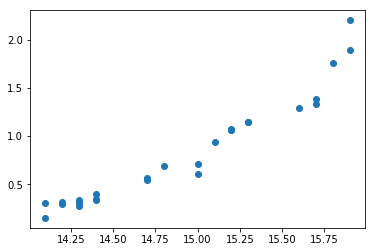

In [17]:
pl.plot([t for t in results['f'][0] if t>0], [p for p in results['f'][2] if p>0], 'o')
pl.show()